SDAIA Project

# Cardiovascular Diseases 

# EDA & Preprocessing 

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report


Gettting To know the data set: 

In [43]:
df = pd.read_csv('cardio_train.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [45]:
df.shape

(70000, 13)

In [46]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


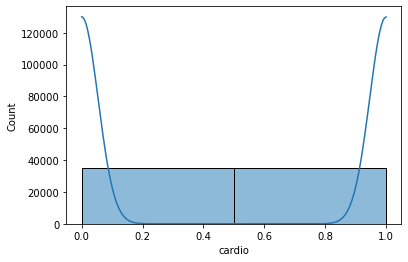

In [49]:
sns.histplot(df['cardio'],bins=2, kde=True);

In [50]:
df.groupby('cardio').count()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021,35021
1,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979,34979


After running the above code, it was noticable that the dataset does not contain any missing value or duplication

In [51]:
df.drop(columns = ['id'],inplace=True )

In [52]:
df['age'] = round(df['age']/356.242199)

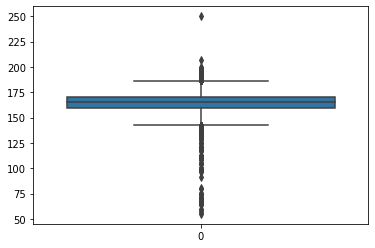

In [53]:
sns.boxplot(data=df['height']);

In [54]:
# calculate summary statistics
data_mean, data_std = mean(df['height']), std(df['height'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in df['height'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['height'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
df = df[(df['height'] <= upper) & (df['height'] >= lower)]

Identified outliers: 293
Non-outlier observations: 69707


Refrence : https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

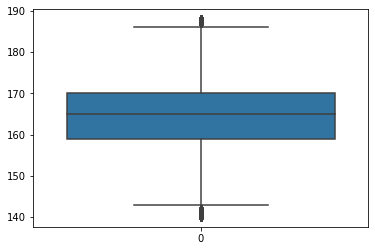

In [55]:
sns.boxplot(data=df['height']);

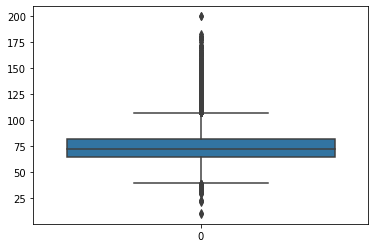

In [56]:
sns.boxplot(data=df['weight']);

In [57]:
# calculate summary statistics
data_mean, data_std = mean(df['weight']), std(df['weight'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in df['weight'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in df['weight'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))
df = df[(df['weight'] <= upper) & (df['weight'] >= lower)]

Identified outliers: 679
Non-outlier observations: 69028


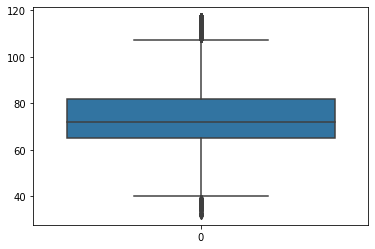

In [58]:
sns.boxplot(data=df['weight']);

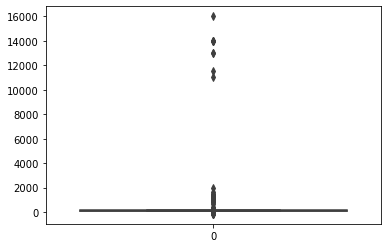

In [59]:
sns.boxplot(data=df['ap_hi']);

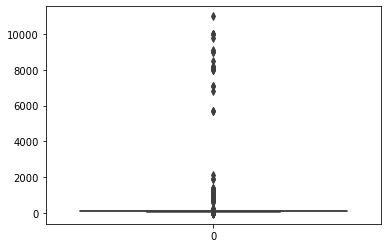

In [60]:
sns.boxplot(data=df['ap_lo']);

In [61]:
df[(df.ap_hi<0)]=df[(df.ap_hi<0)].abs()

In [62]:
df=df[(df.ap_lo>0)]

In [63]:
df = df[(df.ap_hi<400)]

In [64]:
df = df[(df.ap_lo>60)]

In [65]:
df = df[(df.ap_lo<df.ap_hi)]

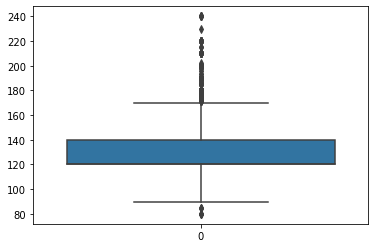

In [66]:
sns.boxplot(data=df['ap_hi']);

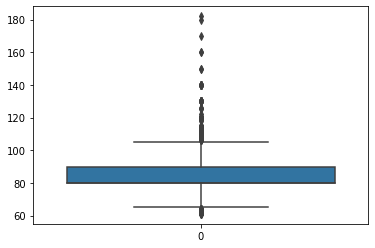

In [67]:
sns.boxplot(data=df['ap_lo']);

In [68]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,52.0,2,168,62.0,110,80,1,1,0,0,1,0
1,57.0,1,156,85.0,140,90,3,1,0,0,1,1
2,53.0,1,165,64.0,130,70,3,1,0,0,0,1
3,49.0,2,169,82.0,150,100,1,1,0,0,1,1
5,62.0,1,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,59.0,1,165,80.0,150,80,1,1,0,0,1,1
69995,54.0,2,168,76.0,120,80,1,1,1,0,1,0
69997,54.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,63.0,1,163,72.0,135,80,1,2,0,0,0,1


In [69]:
df.shape

(64936, 12)

# Feature Engineering

In [70]:
df['BMI']=round(df['weight']/((df['height']/100)**2),2)
df.drop(['height','weight'],axis=1,inplace=True)

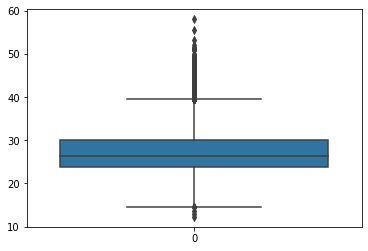

In [71]:
sns.boxplot(data=df['BMI']);

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64936 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64936 non-null  float64
 1   gender       64936 non-null  int64  
 2   ap_hi        64936 non-null  int64  
 3   ap_lo        64936 non-null  int64  
 4   cholesterol  64936 non-null  int64  
 5   gluc         64936 non-null  int64  
 6   smoke        64936 non-null  int64  
 7   alco         64936 non-null  int64  
 8   active       64936 non-null  int64  
 9   cardio       64936 non-null  int64  
 10  BMI          64936 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 8.0 MB


In [73]:
df.BMI = df.BMI.astype(float)


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64936 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64936 non-null  float64
 1   gender       64936 non-null  int64  
 2   ap_hi        64936 non-null  int64  
 3   ap_lo        64936 non-null  int64  
 4   cholesterol  64936 non-null  int64  
 5   gluc         64936 non-null  int64  
 6   smoke        64936 non-null  int64  
 7   alco         64936 non-null  int64  
 8   active       64936 non-null  int64  
 9   cardio       64936 non-null  int64  
 10  BMI          64936 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 8.0 MB


In [80]:
df.loc[df['BMI'] <= 18.5 , 'BMI_'] = 1 #'Underweight'
df.loc[( df['BMI'] > 18.5) & ( df['BMI'] <= 24.9) , 'BMI_'] = 2 #'Normal Weight' 
df.loc[( df['BMI'] > 24.9) & (df['BMI'] <= 29.9) , 'BMI_'] = 3 #'OverWeight'
df.loc[( df['BMI'] > 29.9) , 'BMI_'] = 4 #'Obesityt' 
 #     condition, 'new column name'] = 'value if condition is met'

In [83]:
df.drop(['BMI'],axis=1,inplace=True)

In [84]:
df

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI_
0,52.0,2,110,80,1,1,0,0,1,0,2.0
1,57.0,1,140,90,3,1,0,0,1,1,4.0
2,53.0,1,130,70,3,1,0,0,0,1,2.0
3,49.0,2,150,100,1,1,0,0,1,1,3.0
5,62.0,1,120,80,2,2,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
69994,59.0,1,150,80,1,1,0,0,1,1,3.0
69995,54.0,2,120,80,1,1,1,0,1,0,3.0
69997,54.0,2,180,90,3,1,0,1,0,1,4.0
69998,63.0,1,135,80,1,2,0,0,0,1,3.0


In [85]:
cormat = df.corr()
round(cormat,2)

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI_
age,1.00,-0.03,0.20,0.14,0.15,0.10,-0.05,-0.03,-0.01,0.23,0.10
gender,-0.03,1.00,0.05,0.05,-0.04,-0.02,0.34,0.17,0.01,-0.00,-0.09
ap_hi,0.20,0.05,1.00,0.73,0.20,0.09,0.03,0.03,-0.00,0.42,0.24
ap_lo,0.14,0.05,0.73,1.00,0.16,0.07,0.03,0.04,0.00,0.34,0.21
cholesterol,0.15,-0.04,0.20,0.16,1.00,0.45,0.01,0.03,0.01,0.22,0.16
gluc,0.10,-0.02,0.09,0.07,0.45,1.00,-0.01,0.01,-0.01,0.09,0.10
smoke,-0.05,0.34,0.03,0.03,0.01,-0.01,1.00,0.34,0.03,-0.02,-0.02
alco,-0.03,0.17,0.03,0.04,0.03,0.01,0.34,1.00,0.02,-0.01,0.02
active,-0.01,0.01,-0.00,0.00,0.01,-0.01,0.03,0.02,1.00,-0.04,-0.01
cardio,0.23,-0.00,0.42,0.34,0.22,0.09,-0.02,-0.01,-0.04,1.00,0.17


Refrence: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

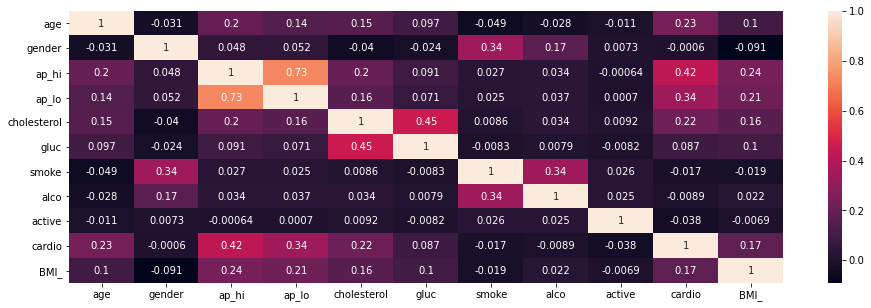

In [86]:
plt.figure(figsize = (16,5))

sns.heatmap(cormat ,annot = True );

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64936 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64936 non-null  float64
 1   gender       64936 non-null  int64  
 2   ap_hi        64936 non-null  int64  
 3   ap_lo        64936 non-null  int64  
 4   cholesterol  64936 non-null  int64  
 5   gluc         64936 non-null  int64  
 6   smoke        64936 non-null  int64  
 7   alco         64936 non-null  int64  
 8   active       64936 non-null  int64  
 9   cardio       64936 non-null  int64  
 10  BMI_         64936 non-null  float64
dtypes: float64(2), int64(9)
memory usage: 8.0 MB


# preparing for modeling 

In [88]:
feature_cols = ['age', 'gender', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','alco','active', 'BMI_']
X = df[feature_cols] # Features
y = df.cardio # Target variable

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [90]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.3, random_state=1)

# Desicion Tree

In [91]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [92]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6742377579303973
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      6351
           1       0.73      0.58      0.65      6637

    accuracy                           0.67     12988
   macro avg       0.68      0.68      0.67     12988
weighted avg       0.68      0.67      0.67     12988



In [93]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 129.50
|   |--- feature_0 <= 56.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_0 <= 45.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- feature_2 <= 114.50
|   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 40.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  40.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 108.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  108.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 75.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 43.50
|   | 

In [94]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train1,y_train1)

#Predict the response for test dataset
y_pred1 = clf.predict(X_test1)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

Accuracy: 0.6730660643704122
              precision    recall  f1-score   support

           0       0.64      0.76      0.70      9617
           1       0.72      0.59      0.64      9864

    accuracy                           0.67     19481
   macro avg       0.68      0.67      0.67     19481
weighted avg       0.68      0.67      0.67     19481



In [96]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 129.50
|   |--- feature_0 <= 56.50
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_0 <= 46.50
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- feature_2 <= 114.50
|   |   |   |   |   |   |--- feature_5 <= 1.50
|   |   |   |   |   |   |   |--- feature_9 <= 2.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_9 >  1.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |--- feature_0 >  43.50
|   |   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth

# KNN

In [97]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6986449029873729
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      6351
           1       0.72      0.67      0.70      6637

    accuracy                           0.70     12988
   macro avg       0.70      0.70      0.70     12988
weighted avg       0.70      0.70      0.70     12988



In [98]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train1, y_train1)
y_pred1 = knn.predict(X_test1)
print(metrics.accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

0.6948821929059084
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      9617
           1       0.70      0.69      0.69      9864

    accuracy                           0.69     19481
   macro avg       0.70      0.70      0.69     19481
weighted avg       0.70      0.69      0.69     19481



# Logistic Regression 

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7235140129350169
              precision    recall  f1-score   support

           0       0.69      0.78      0.74      6351
           1       0.76      0.66      0.71      6637

    accuracy                           0.72     12988
   macro avg       0.73      0.72      0.72     12988
weighted avg       0.73      0.72      0.72     12988



In [101]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
y_pred1 = logreg.predict(X_test1)
print(metrics.accuracy_score(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))

0.722601509162774
              precision    recall  f1-score   support

           0       0.70      0.78      0.73      9617
           1       0.76      0.67      0.71      9864

    accuracy                           0.72     19481
   macro avg       0.73      0.72      0.72     19481
weighted avg       0.73      0.72      0.72     19481



# Cross-validation: parameter tuning

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.70172467 0.7131198  0.6960271  0.73082846 0.68925162 0.72944256
 0.68181118 0.68951178 0.72077622 0.69151394]


C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
print(scores.mean())

0.704400733186354


In [106]:
from sklearn.model_selection import GridSearchCV

In [108]:
# create a parameter grid: map the parameter names to the values that should be searched
grid={'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}


In [109]:
# instantiate the grid
grid = GridSearchCV(logreg, grid, cv=10, scoring='accuracy')

In [110]:
# fit the grid with data
grid.fit(X, y);

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [111]:
# examine the best model
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'C': 0.001, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=0.001)
Best score:  0.716089637837455


# Final Model

In [112]:
logreg = LogisticRegression(C= 0.001, penalty= 'l2')
logreg.fit(X_train, y_train)

C:\Users\mahaa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.001)

In [113]:
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7247459193101324
              precision    recall  f1-score   support

           0       0.69      0.79      0.74      6351
           1       0.77      0.66      0.71      6637

    accuracy                           0.72     12988
   macro avg       0.73      0.73      0.72     12988
weighted avg       0.73      0.72      0.72     12988



# Thank You!